## **Logistic**

## **1.Instalaciones y Importaciones**

In [1]:
!pip install MissForest

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import shap
import lightgbm as lgb
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression





In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

## **2.Subimos Database**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank-data.csv to bank-data.csv


## **3. Abrimos Database**

In [5]:
df = pd.read_csv('bank-data.csv', sep=';')
pd.set_option('display.max_columns', None)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

## **4.Descripción de Variables:**

In [7]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: age
     Conteo  Porcentaje (%)
age                        
31     1947            4.73
32     1846            4.48
33     1833            4.45
36     1780            4.32
35     1759            4.27
..      ...             ...
91        2            0.00
98        2            0.00
95        1            0.00
87        1            0.00
94        1            0.00

[78 rows x 2 columns]

Columna: job
               Conteo  Porcentaje (%)
job                                  
admin.          10422           25.30
blue-collar      9254           22.47
technician       6743           16.37
services         3969            9.64
management       2924            7.10
retired          1720            4.18
entrepreneur     1456            3.54
self-employed    1421            3.45
housemaid        1060            2.57
unemployed       1014            2.46
student           875            2.12
unknown           330            0.80

Columna: marital
          Conteo  Porcentaje (%)
ma

## **5.Cribado Manual**

## 5.1 Cambiamos Nombre de Columna Y a Depósito

In [8]:
df.rename(columns={'y': 'deposito'}, inplace=True)

## 5.2 Reemplazamos las palabras NAN NULL UNKNOWN NOENXISTENT 999 POR NAN en nuestro Dataset

In [9]:
df.replace(["nan", "NULL", "unknown", "nonexistent", "999", 999], np.nan, inplace=True)

faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
job,0.801204
marital,0.194231
education,4.202680
default,20.872584
housing,2.403613
loan,2.403613
duration,0.004856
pdays,96.321744
poutcome,86.343110


In [10]:
print(df.shape)

(41188, 21)


## 5.3 Identificar columnas con columnas constantes**   No tenemos columnas con valores constantes


In [11]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## 5.4 Eliminamos filas y columnas duplicadas** Eliminamos 12 filas y No hay columnas Duplicadas.

In [12]:
df.duplicated().sum()

np.int64(12)

In [13]:
df[df.duplicated(keep=False)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,NaN,no,no,no,telephone,jul,thu,88.0,1,NaN,0,NaN,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,88.0,1,NaN,0,NaN,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.0,2,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.0,2,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.0,3,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.0,3,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,NaN,0,NaN,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,NaN,0,NaN,1.4,93.918,-42.7,4.968,5228.1,no


In [14]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.duplicated().sum()


np.int64(0)

In [15]:
df.T.duplicated().sum()

np.int64(0)

In [16]:
df.T.duplicated(keep=False)

,0
age,False
job,False
marital,False
education,False
default,False
housing,False
loan,False
contact,False
month,False
day_of_week,False


## 5.5 Eliminamos Columnas redundantes. No tenemos columnas redundantes.

In [17]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


## **6.Eliminar columnas Data leakage**

In [18]:
##df.drop('deposito', axis=1, inplace=True)

## **7. Analisis Valores sin sentido** No tenemos valores sin sentido.

## **8. Valores faltantes por columna** Tiene que ser mayor a 40 % Para poder eliminarlas
mnar, mar, mcar... Eliminamos 2

In [19]:
df.shape

(41176, 21)

In [20]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
job,0.801438
marital,0.194288
education,4.201477
default,20.876239
housing,2.404313
loan,2.404313
duration,0.004857
pdays,96.320672
poutcome,86.339130


Eliminamos poutcome

In [21]:
df = df.drop(["poutcome", "pdays"], axis=1)

In [22]:
df.shape

(41176, 19)

## **9. Valores faltantes por filas**. Se mira cuantas valores faltantes hay en los clientes. No eliminamos ninguna

In [23]:
df.isnull().any(axis=1).sum()

np.int64(10700)

In [24]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,55.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,336.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
78,55,management,married,NaN,NaN,yes,no,telephone,may,mon,272.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
92,60,admin.,married,NaN,NaN,no,yes,telephone,may,mon,213.0,2,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41002,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,212.0,2,0,-1.1,94.601,-49.5,1.025,4963.6,yes
41003,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,256.0,2,1,-1.1,94.601,-49.5,1.025,4963.6,no
41017,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,83.0,2,2,-1.1,94.601,-49.5,1.032,4963.6,no
41096,64,NaN,married,NaN,no,no,no,cellular,nov,mon,78.0,1,3,-1.1,94.767,-50.8,1.048,4963.6,no


In [25]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,211.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,212.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,48.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
299,38,NaN,married,NaN,NaN,no,no,telephone,may,mon,362.0,4,0,1.1,93.994,-36.4,4.857,5191.0,no
343,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,325.0,2,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,62,technician,married,NaN,no,NaN,NaN,cellular,jul,mon,220.0,3,1,-1.7,94.215,-40.3,0.827,4991.6,yes
40267,25,self-employed,single,NaN,no,NaN,NaN,cellular,jul,wed,844.0,5,2,-1.7,94.215,-40.3,0.896,4991.6,yes
40644,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,220.0,2,2,-1.1,94.199,-37.5,0.880,4963.6,yes
40649,31,student,single,NaN,no,NaN,NaN,cellular,sep,wed,708.0,2,2,-1.1,94.199,-37.5,0.880,4963.6,yes


In [26]:
n = 4
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,362.0,1,0,1.1,93.994,-36.4,4.857,5191.0,no
768,38,technician,married,NaN,NaN,NaN,NaN,telephone,may,wed,162.0,2,0,1.1,93.994,-36.4,4.856,5191.0,no
1914,44,NaN,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,226.0,2,0,1.1,93.994,-36.4,4.855,5191.0,no
1948,34,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,fri,298.0,2,0,1.1,93.994,-36.4,4.855,5191.0,no
2005,57,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,mon,98.0,3,0,1.1,93.994,-36.4,4.857,5191.0,no
4342,38,blue-collar,divorced,NaN,NaN,NaN,NaN,telephone,may,tue,81.0,2,0,1.1,93.994,-36.4,4.856,5191.0,no
7328,42,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,fri,311.0,4,0,1.1,93.994,-36.4,4.864,5191.0,no
8838,59,technician,married,NaN,NaN,NaN,NaN,telephone,jun,thu,247.0,2,0,1.4,94.465,-41.8,4.866,5228.1,no
10640,49,admin.,single,NaN,NaN,NaN,NaN,telephone,jun,tue,479.0,1,0,1.4,94.465,-41.8,4.961,5228.1,no
10922,51,blue-collar,divorced,NaN,NaN,NaN,NaN,telephone,jun,wed,339.0,2,0,1.4,94.465,-41.8,4.962,5228.1,no


In [27]:
n = 5
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
2722,45,NaN,married,NaN,NaN,NaN,NaN,telephone,may,wed,179.0,1,0,1.1,93.994,-36.4,4.859,5191.0,no
21549,44,NaN,married,NaN,NaN,NaN,NaN,cellular,aug,tue,163.0,1,0,1.4,93.444,-36.1,4.963,5228.1,no


In [28]:
n = 6
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito


<Axes: >

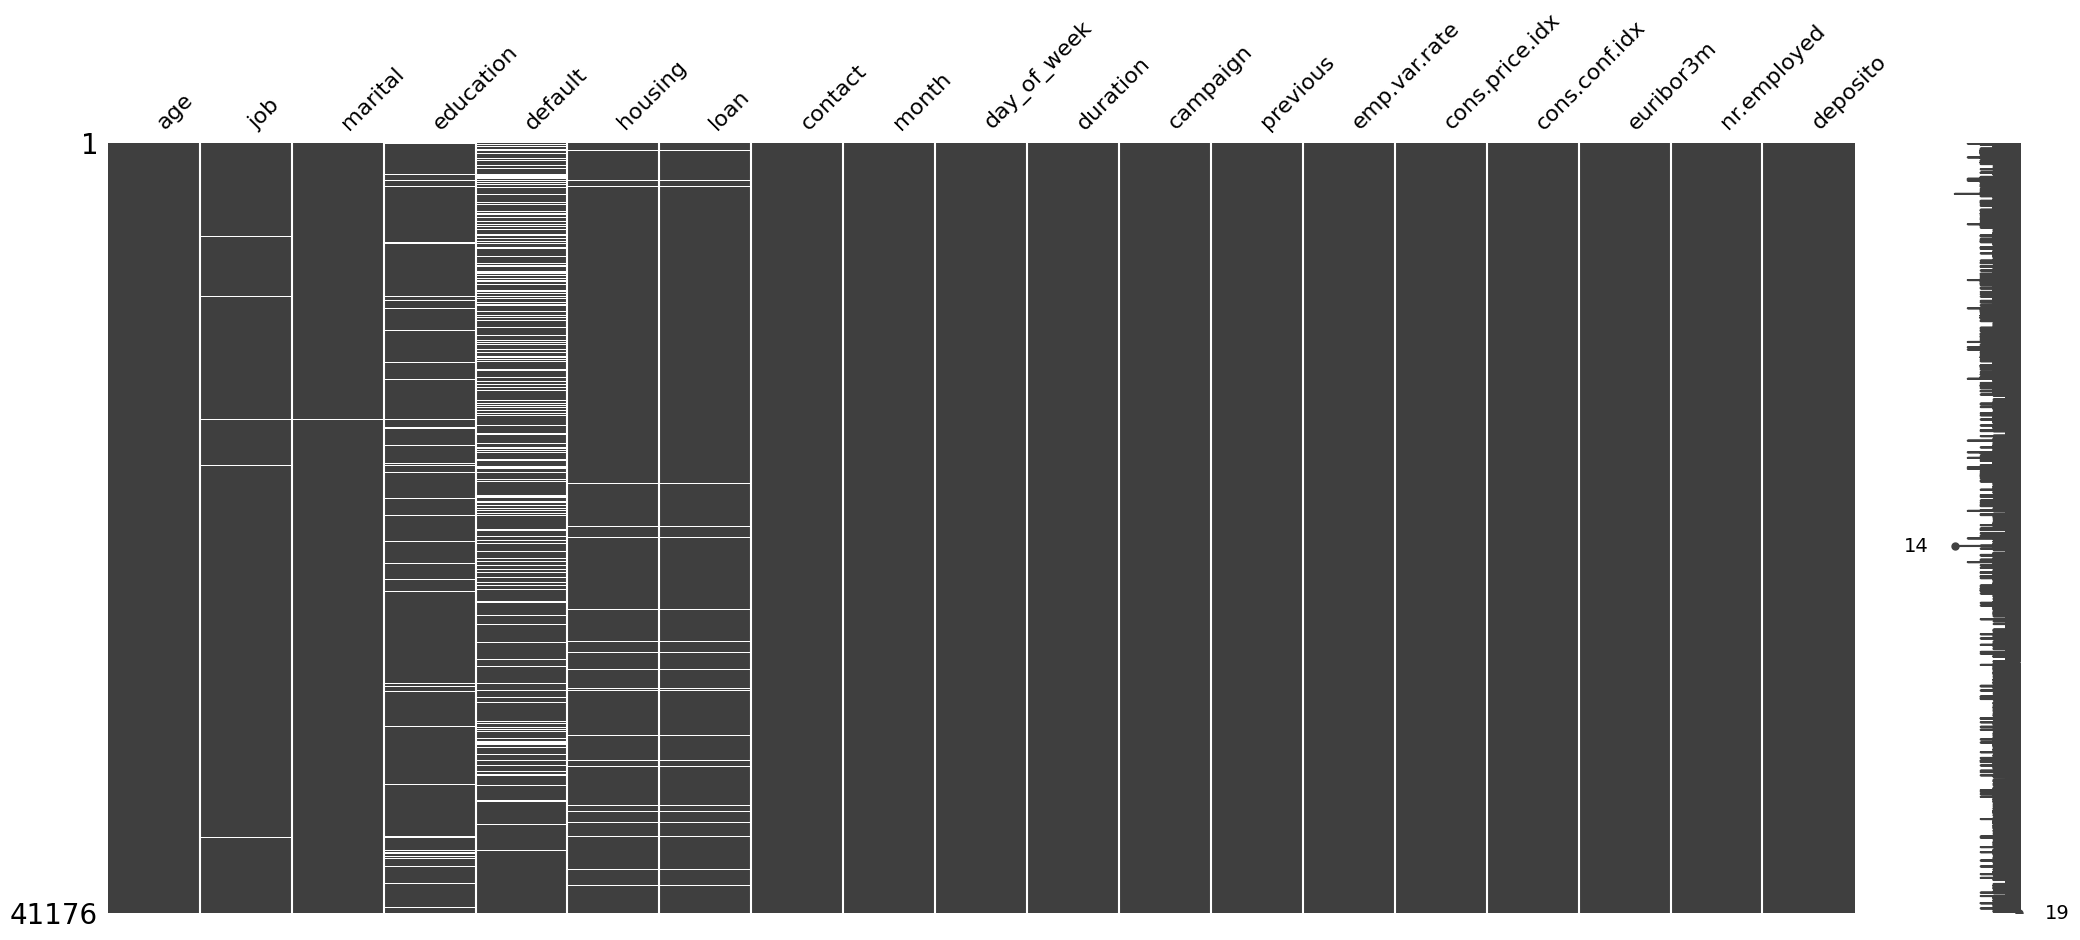

In [29]:
msno.matrix(df)

## **10. Convertir variables Y a binaria.**

In [30]:
df['deposito'] = df['deposito'].map({'yes': 1, 'no': 0})

## **11. Categorizar Variables String. Menos Job que la Categorizaremos por Metodo Target Encoding**

In [31]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')


In [32]:
mapping_education = {
    'university.degree': 7,
    'high.school': 6,
    'basic.9y': 5,
    'professional.course': 4,
    'basic.4y': 3,
    'basic.6y': 2,
    'unknown': 1,
    'illiterate': 0
}
df['education_encoded'] = df['education'].map(mapping_education)

In [33]:
mapping_day_of_week = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
}

df['day_of_week_encoded'] = df['day_of_week'].map(mapping_day_of_week)

In [34]:
mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

df['month_encoded'] = df['month'].map(mapping_month)

In [35]:
mapping_binary = {
    'no': 0,
    'yes': 1
}

df['default_encoded'] = df['default'].map(mapping_binary)
df['housing_encoded'] = df['housing'].map(mapping_binary)
df['loan_encoded'] = df['loan'].map(mapping_binary)

In [36]:
mapping_contact = {
    'telephone': 0,
    'cellular': 1
}

df['contact_encoded'] = df['contact'].map(mapping_contact)
mapping_marital = {
    'single': 0,
    'married': 1,
    'divorced': 2
}

df['marital_encoded'] = df['marital'].map(mapping_marital)

## **12. Borrar las categorías que estaban en String** Menos la de Target Encoding. Job


In [37]:
df.drop(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'], axis=1, inplace=True)

## **13. Hacer Train-Split**

In [38]:
X = df.drop('deposito',axis=1)
y = df['deposito']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.columns

Index(['age', 'job', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'education_encoded', 'day_of_week_encoded', 'month_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'marital_encoded'],
      dtype='object')

In [41]:
X_train.shape

(32940, 18)

## **14. Categorizar Job. por Target Encoding**

In [42]:
temp = X_train.copy()
temp['deposito'] = y_train

# Crear el mapping
job_mapping = temp.groupby('job')['deposito'].mean()
print(job_mapping)

# Aplicar el Target Encoding
X_train['job_encoded'] = X_train['job'].map(job_mapping)
X_test['job_encoded'] = X_test['job'].map(job_mapping)


job
admin.           0.127391
blue-collar      0.069349
entrepreneur     0.082892
housemaid        0.101382
management       0.113838
retired          0.250909
self-employed    0.109589
services         0.082209
student          0.306003
technician       0.104201
unemployed       0.139417
Name: deposito, dtype: float64


## **15. Quitar la Categoria Job. Recien Categorizadas**

In [43]:
X_train.drop(['job'], axis=1, inplace=True)
X_test.drop(['job'], axis=1, inplace=True)

## **16. Chequear los NA**

In [44]:
faltantes = X_train.isna().mean()*100
faltantes[faltantes>0]

,0
duration,0.003036
education_encoded,4.225865
default_encoded,20.734669
housing_encoded,2.395264
loan_encoded,2.395264
marital_encoded,0.197328
job_encoded,0.834851


## **17. Imputar** Usamos librería Missforest

<Axes: >

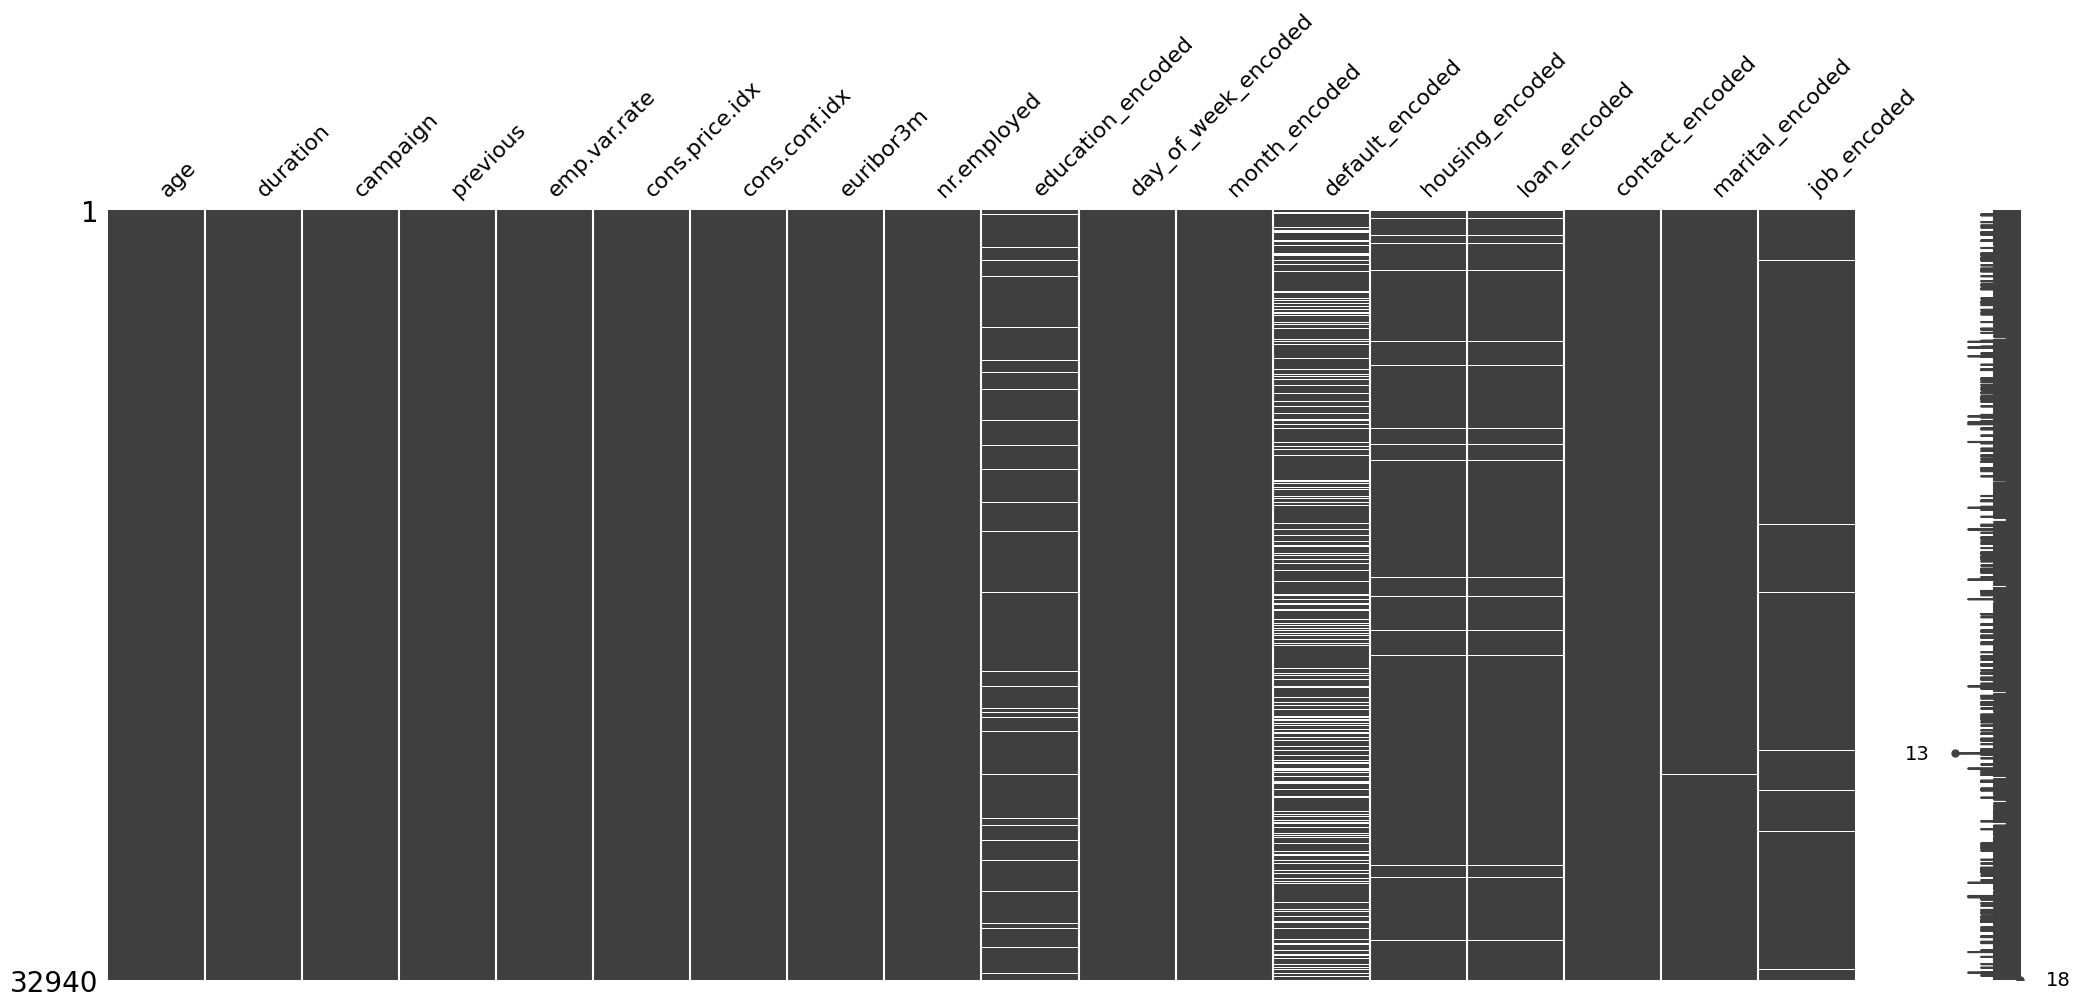

In [45]:
msno.matrix(X_train)

In [46]:
X_train[['job_encoded','education_encoded','default_encoded','housing_encoded','loan_encoded','marital_encoded','duration']]

,job_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,marital_encoded,duration
12346,0.082892,2.0,0.0,1.0,1.0,1.0,286.0
8564,0.127391,7.0,0.0,0.0,0.0,0.0,178.0
21417,0.127391,7.0,0.0,0.0,0.0,0.0,103.0
3315,0.127391,7.0,0.0,0.0,0.0,0.0,135.0
33236,0.069349,6.0,NaN,0.0,0.0,0.0,418.0
...,...,...,...,...,...,...,...
6265,0.069349,5.0,0.0,0.0,1.0,1.0,100.0
11284,0.127391,5.0,0.0,1.0,0.0,1.0,120.0
38158,0.250909,3.0,0.0,0.0,0.0,1.0,250.0
860,0.113838,7.0,0.0,1.0,0.0,1.0,295.0


In [47]:
categoricas = X_train.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index([], dtype='object')


In [48]:
X_train['job_encoded'].value_counts(normalize=True)*100
X_train['education_encoded'].value_counts(normalize=True)*100
X_train['default_encoded'].value_counts(normalize=True)*100
X_train['housing_encoded'].value_counts(normalize=True)*100
X_train['loan_encoded'].value_counts(normalize=True)*100
X_train['marital_encoded'].value_counts(normalize=True)*100
X_train['duration'].value_counts(normalize=True)*100

,proportion
duration,
90.0,0.440208
85.0,0.431100
72.0,0.421992
136.0,0.415920
73.0,0.412884
...,...
1329.0,0.003036
1368.0,0.003036
1123.0,0.003036


In [49]:
imputer = MissForest()

X_train_imp = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 80%|████████  | 4/5 [00:50<00:12, 12.77s/it]/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 80%|████████  | 4/5 [01:06<00:16, 16.72s/it]
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.12/dist-p

In [50]:
X_train_imp['marital_encoded'].value_counts(normalize=True)*100

,proportion
marital_encoded,
1.000000,60.431087
0.000000,28.105647
2.000000,11.265938
1.067697,0.003036
0.848551,0.003036
...,...
1.248982,0.003036
0.280938,0.003036
1.074086,0.003036


In [51]:
X_test.dtypes

,0
age,int64
duration,float64
campaign,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64
cons.conf.idx,float64
euribor3m,float64
nr.employed,float64
education_encoded,float64


In [52]:
X_test[['job_encoded','education_encoded','default_encoded','housing_encoded','loan_encoded','marital_encoded','duration']]

,job_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,marital_encoded,duration
36254,0.250909,4.0,0.0,1.0,1.0,1.0,1460.0
32662,0.069349,5.0,0.0,0.0,0.0,1.0,248.0
40860,0.104201,4.0,0.0,1.0,0.0,1.0,275.0
32897,0.127391,6.0,0.0,1.0,1.0,1.0,186.0
16461,0.082209,5.0,0.0,1.0,0.0,0.0,184.0
...,...,...,...,...,...,...,...
18999,0.069349,3.0,0.0,0.0,0.0,1.0,76.0
34242,0.104201,5.0,0.0,1.0,0.0,1.0,7.0
13573,0.139417,7.0,NaN,0.0,0.0,1.0,106.0
1871,0.069349,4.0,0.0,1.0,0.0,1.0,106.0


In [53]:
categoricas = X_test.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index([], dtype='object')


In [54]:

X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)


/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:574: UserWarning: Stopping criterion triggered during transform. Before last imp

In [55]:
X_train_imp.shape

(32940, 18)

## **18.Outliers**

In [56]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.0,40.040650,10.431343,17.000000,32.000000,38.000000,47.000000,98.000000
duration,32940.0,256.952951,258.082023,0.000000,102.000000,178.000000,318.000000,4918.000000
campaign,32940.0,2.576321,2.784568,1.000000,1.000000,2.000000,3.000000,56.000000
previous,32940.0,0.172253,0.494133,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,32940.0,0.083400,1.569619,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,32940.0,93.576831,0.578718,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,32940.0,-40.521591,4.625815,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,32940.0,3.621642,1.734162,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,32940.0,5167.059405,72.374453,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000
education_encoded,32940.0,5.319991,1.546397,0.000000,4.000000,6.000000,7.000000,7.000000


In [57]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [58]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,25613
-1,7327


## **19. Seleccion de Características**

Método 1: Feature importance de RF

In [59]:
# Entrenamiento de RF
model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train_imp, y_train)

In [60]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [61]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
1,duration,32.926856,32.926856
7,euribor3m,12.407117,45.333973
0,age,9.317596,54.651570
8,nr.employed,6.607605,61.259174
17,job_encoded,5.013596,66.272770
9,education_encoded,4.448298,70.721068
2,campaign,4.247265,74.968333
10,day_of_week_encoded,3.968563,78.936896
6,cons.conf.idx,2.964655,81.901551
4,emp.var.rate,2.563313,84.464864


Método 2: Permutation/Shuffle importance

In [62]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo

model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss').fit(X_train1, y_train1)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:16:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(
    model_xgb,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'  # o 'roc_auc' si es binaria
)

In [64]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
4,emp.var.rate,11.434426
1,duration,4.875531
7,euribor3m,1.672738
8,nr.employed,1.088342
5,cons.price.idx,0.455373
15,contact_encoded,0.259563
3,previous,0.195811
0,age,0.194293
10,day_of_week_encoded,0.185185
6,cons.conf.idx,0.182149


Método 3: SHAP

In [65]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

 97%|=================== | 6358/6588 [00:26<00:00]       

In [66]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
1,duration,31.228609
4,emp.var.rate,29.842923
7,euribor3m,12.833885
8,nr.employed,6.635925
5,cons.price.idx,3.738739
6,cons.conf.idx,3.510205
15,contact_encoded,2.759147
0,age,1.702649
2,campaign,1.275239
11,month_encoded,1.221653


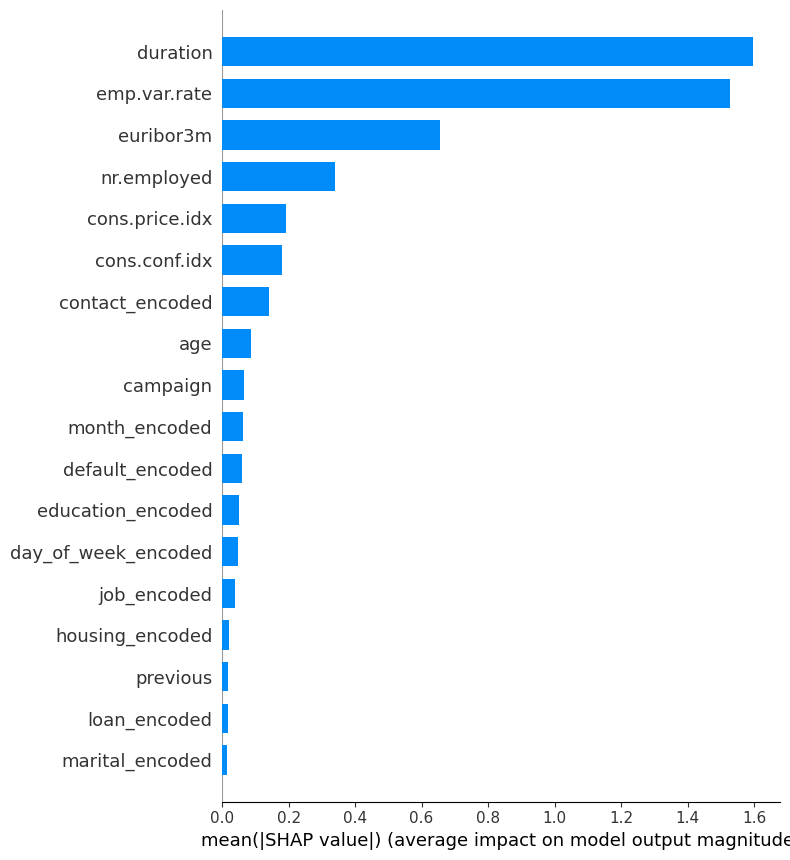

In [67]:
# --- SHAP Summary Bar Plot ---
shap.summary_plot(shap_vals, X_val, plot_type="bar")

Unión 3 métodos

In [68]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
7,duration,32.926856,32.926856,4.875531,31.228609
10,euribor3m,12.407117,45.333973,1.672738,12.833885
0,age,9.317596,54.651570,0.194293,1.702649
16,nr.employed,6.607605,61.259174,1.088342,6.635925
12,job_encoded,5.013596,66.272770,-0.022769,0.783306
8,education_encoded,4.448298,70.721068,-0.078931,1.013341
1,campaign,4.247265,74.968333,0.100182,1.275239
5,day_of_week_encoded,3.968563,78.936896,0.185185,0.926645
2,cons.conf.idx,2.964655,81.901551,0.182149,3.510205
9,emp.var.rate,2.563313,84.464864,11.434426,29.842923


In [69]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
7,duration,32.926856,32.926856,4.875531,31.228609
10,euribor3m,12.407117,45.333973,1.672738,12.833885
16,nr.employed,6.607605,61.259174,1.088342,6.635925
9,emp.var.rate,2.563313,84.464864,11.434426,29.842923


## **20. Medir Correlación de Variables**

In [70]:
features = df_filt['feature']
features

,feature
7,duration
10,euribor3m
16,nr.employed
9,emp.var.rate


In [71]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
duration,1.002597
euribor3m,31.134709
nr.employed,9.607694
emp.var.rate,18.668023


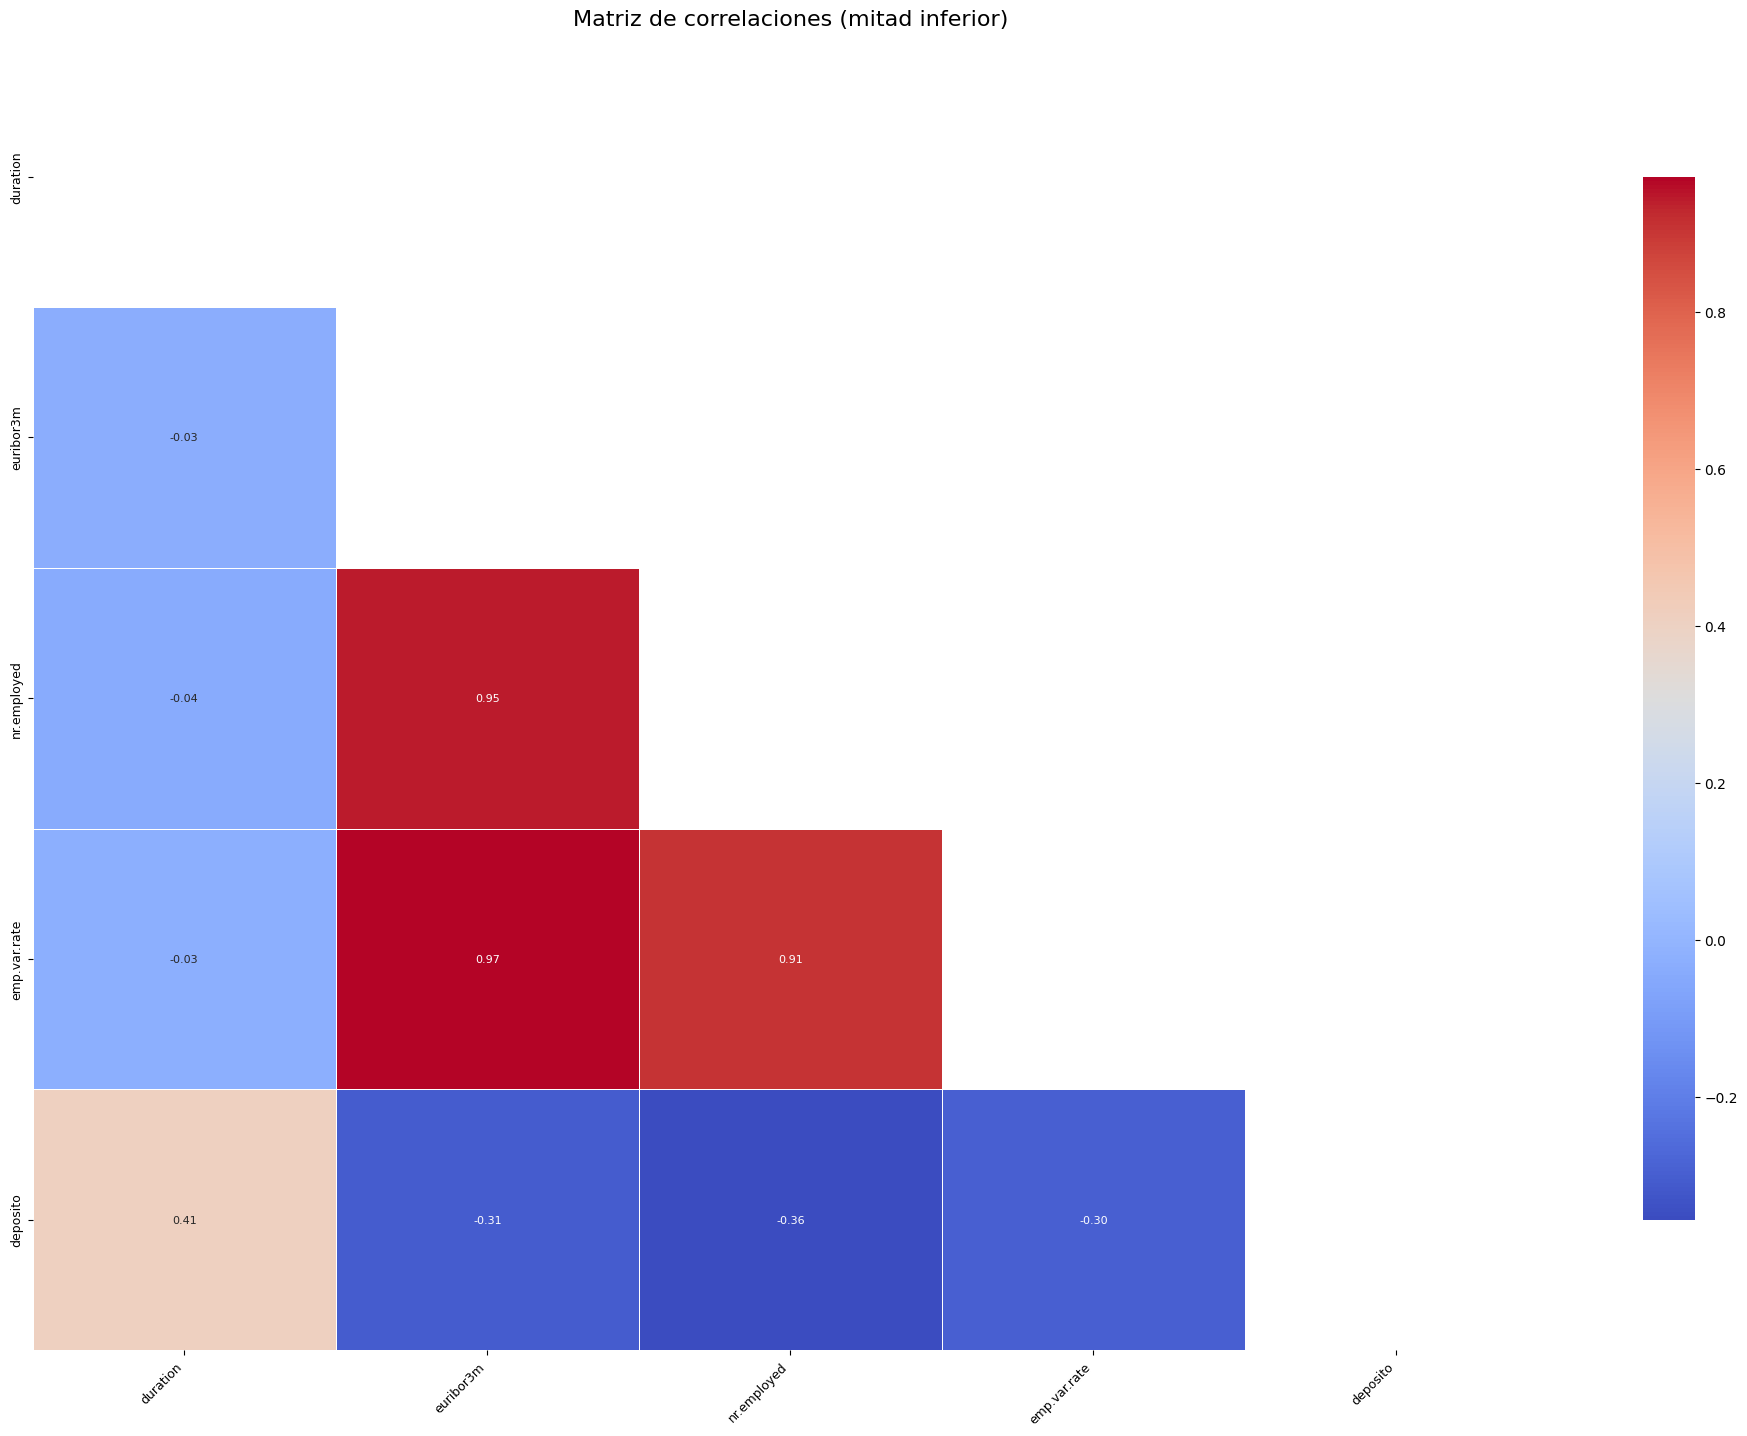

In [72]:
X_copy = X_train_imp[features].copy()
X_copy['deposito'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **21.Cross Validation**

In [73]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
model = LogisticRegression(max_iter=1000, solver='saga')

cv_results = cross_val_score(
    model,
    X_train_imp[features],
    y_train,
    cv=3,
    scoring='accuracy'
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
print("Accuracy promedio CV:", cv_results.mean())

Accuracy promedio CV: 0.8954462659380692


In [75]:
# 1. Quitar las dos columnas del dataset
X_train_clean = X_train_imp.drop(columns=['emp.var.rate'])

# 2. Actualizar lista de features
features = X_train_clean.columns.tolist()

# 3. Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(
    max_iter=5000,   # recomendado para evitar ConvergenceWarning
    solver='saga'
)

# 4. Cross-validation
cv_results = cross_val_score(
    model,
    X_train_clean[features],
    y_train,
    cv=3,
    scoring='accuracy'
)

In [76]:
print("Accuracy promedio CV:", cv_results.mean())

Accuracy promedio CV: 0.9017304189435338


## **22.Modelado**

In [77]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train_imp[features]
X_test_sel = X_test_imp[features]

In [78]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.0,40.040650,10.431343,17.000000,32.000000,38.000000,47.000000,98.000000
duration,32940.0,256.952951,258.082023,0.000000,102.000000,178.000000,318.000000,4918.000000
campaign,32940.0,2.576321,2.784568,1.000000,1.000000,2.000000,3.000000,56.000000
previous,32940.0,0.172253,0.494133,0.000000,0.000000,0.000000,0.000000,7.000000
cons.price.idx,32940.0,93.576831,0.578718,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,32940.0,-40.521591,4.625815,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,32940.0,3.621642,1.734162,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,32940.0,5167.059405,72.374453,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000
education_encoded,32940.0,5.319991,1.546397,0.000000,4.000000,6.000000,7.000000,7.000000
day_of_week_encoded,32940.0,2.979053,1.409392,1.000000,2.000000,3.000000,4.000000,5.000000


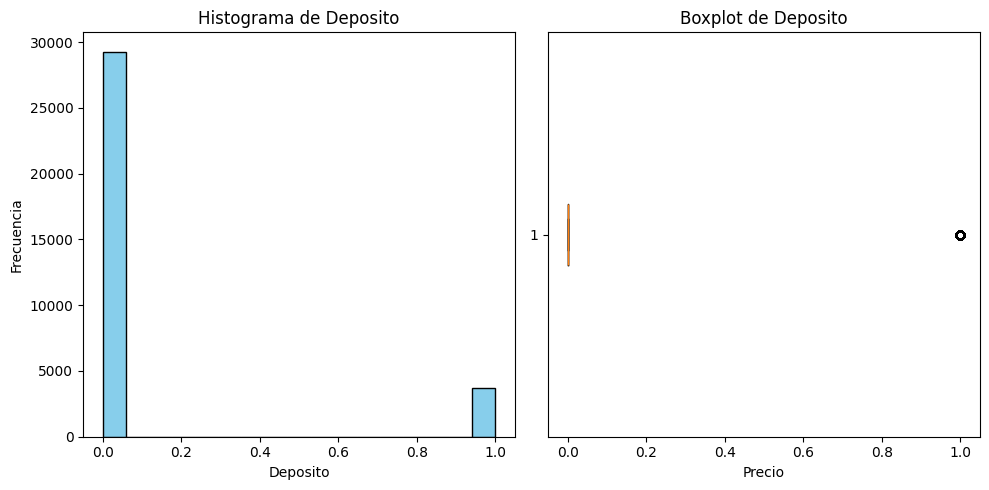

In [79]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Deposito')
ax[0].set_xlabel('Deposito')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de Deposito')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [80]:
y_train.skew()

np.float64(2.4710795926149975)

In [81]:
y_train.describe()

,deposito
count,32940.000000
mean,0.111354
std,0.314575
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## **23. Logaritmo** No podemos hacer porque la Variable Y tiene valores cero.

## **24. Separacion**

In [82]:
X_train1, X_val, y_train1, y_val = train_test_split(
    X_train_sel,   # tus features seleccionadas e imputadas
    y_train,       # tu variable objetivo
    test_size=0.2, # 20% para validación
    random_state=42,
    stratify=y_train  # opcional, asegura que la proporción de clases se mantenga
)

## **25.Escalar los datos**

In [83]:
scaler = StandardScaler()

# Ajustamos SOLO con los datos de entrenamiento
X_train_sc1 = scaler.fit_transform(X_train1)

# Transformamos la validación con el mismo scaler
X_val_sc = scaler.transform(X_val)

## **26.Busqueda de Hiperparametros**

Búsqueda extensiva

In [84]:
param_dist = [
    # Configuraciones válidas para solver = liblinear
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': loguniform(1e-4, 1e2),
        'max_iter': [200, 500, 1000]
    },

    # Configuraciones válidas para solver = saga (incluye elasticnet)
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9],   # requerido para elasticnet
        'C': loguniform(1e-4, 1e2),
        'max_iter': [200, 500, 1000]
    }
]

model = LogisticRegression()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',   # o lo que corresponda
    n_jobs=-1,
    random_state=123
)

random_search.fit(X_train_sc1, y_train1)
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

best_model = random_search.best_estimator_

Mejores hiperparámetros encontrados:
{'C': np.float64(0.0610391299289319), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


Busqueda Intensiva

In [ ]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Espacio de búsqueda intensiva
param_grid = {
    # Valores típicos de C (más acotado que en random search)
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],

    # Penalizaciones compatibles
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],

    # Solvers compatibles
    'solver': ['liblinear', 'saga', 'lbfgs'],

    # Solo se usa con elasticnet + saga
    'l1_ratio': np.linspace(0, 1, 5)
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',    # cámbialo si necesitas F1, ROC-AUC, etc.
    cv=5,
    verbose=3,
    n_jobs=-1
)

grid_search.fit(X_train_sc1, y_train1)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


In [ ]:
# Predicciones
yhat_train = best_model.predict(X_train_imp[features])
yhat_test = best_model.predict(X_test_imp[features])

# Probabilidades solo si vas a usar ROC AUC
yhat_train_prob = best_model.predict_proba(X_train_imp[features])[:,1]
yhat_test_prob = best_model.predict_proba(X_test_imp[features])[:,1]

# Métricas reducidas
def get_metrics_small(y_train, yhat_train, y_train_prob, y_test, yhat_test, y_test_prob):
    metrics_train = {
        'Accuracy': accuracy_score(y_train, yhat_train),
        'F1': f1_score(y_train, yhat_train),
        # Quita esta línea si quieres aún menos cálculos
        'ROC AUC': roc_auc_score(y_train, y_train_prob)
    }
    metrics_test = {
        'Accuracy': accuracy_score(y_test, yhat_test),
        'F1': f1_score(y_test, yhat_test),
        'ROC AUC': roc_auc_score(y_test, y_test_prob)
    }
    return pd.DataFrame([metrics_train, metrics_test], index=['Train', 'Test'])

# Crear tabla de métricas reducidas
metrics = get_metrics_small(y_train1, yhat_train, yhat_train_prob,
                            y_val, yhat_test, yhat_test_prob)

print(metrics)

# Matriz de confusión opcional
print("Confusion Matrix (Test):")
print(confusion_matrix(y_val, yhat_test))